In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.ensemble import IsolationForest
from joblib import dump, load

In [2]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [3]:
clf = IsolationForest(contamination=0.001, random_state=16)
clf.fit(X_train)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, random_state=16)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


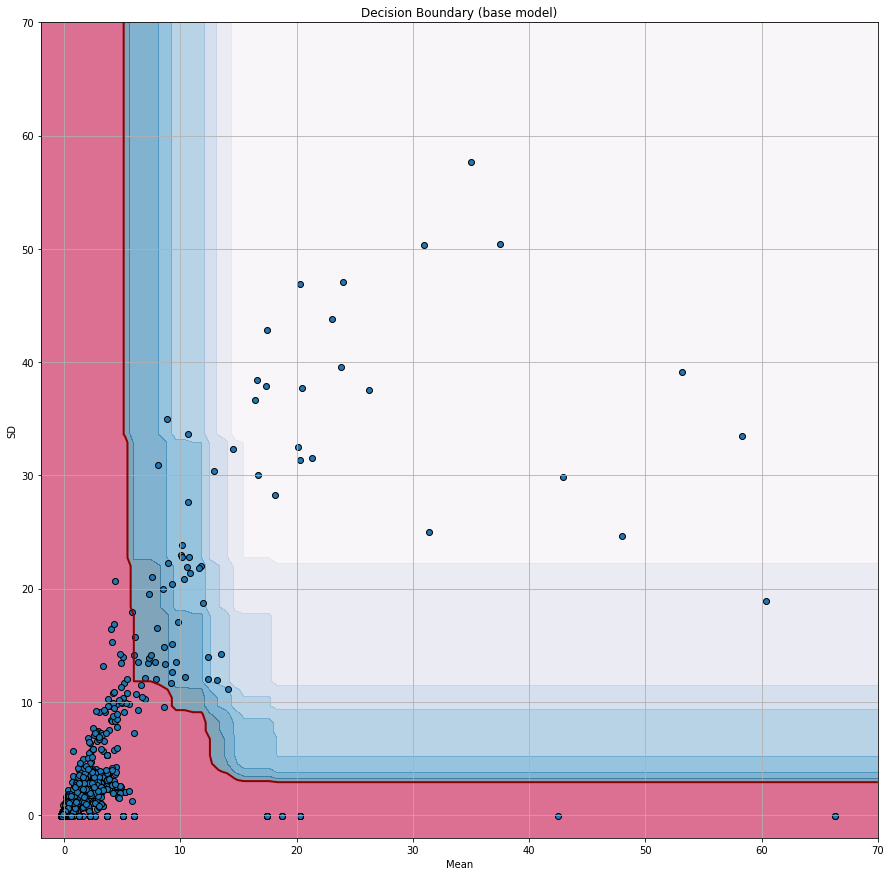

In [4]:
import matplotlib.pyplot as plt

# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(X_train.iloc[:, 0],
            X_train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [5]:
pred = clf.predict(X_test)
res= pd.concat([X_test, pd.Series(pred)], axis=1)
res.set_axis(['mean', 'sd', 'label'], axis=1, inplace=True)
res['col'] = res.apply(lambda row: 'b' if (row.label == 1) else 'r', axis=1)
res

/usr/local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


,mean,sd,label,col
0,-0.157953,-0.106749,1,b
1,-0.157953,-0.106749,1,b
2,-0.157953,-0.106242,1,b
3,-0.284889,-0.106749,1,b
4,-0.157953,-0.106242,1,b
...,...,...,...,...
16052,-0.157953,-0.106242,1,b
16053,-0.157953,-0.106242,1,b
16054,-0.038950,0.020446,1,b
16055,-0.157953,-0.106242,1,b


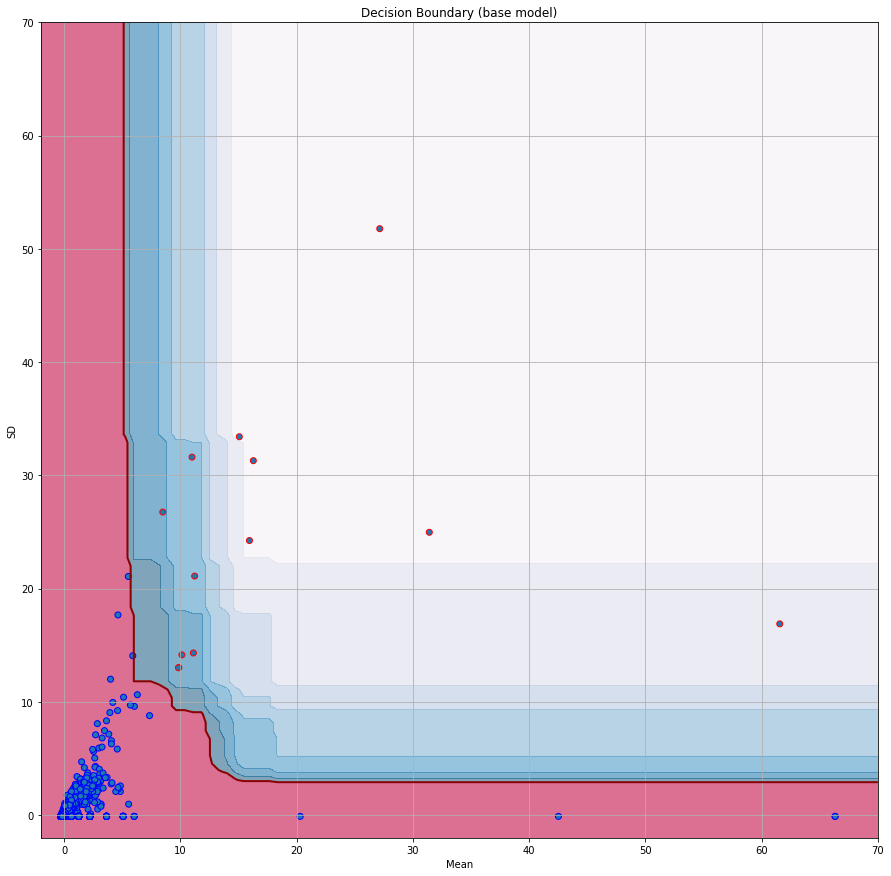

In [6]:
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(res.iloc[:, 0],
            res.iloc[:, 1],
            edgecolors=res['col'])
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [7]:
dump(clf, 'model.joblib')

['model.joblib']